In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [2]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
#load dataset
df = pd.read_csv("international_matches.csv")
df.head()

date home_team     away_team home_team_continent away_team_continent  \
0  1993-08-08   Bolivia       Uruguay       South America       South America   
1  1993-08-08    Brazil        Mexico       South America       North America   
2  1993-08-08   Ecuador     Venezuela       South America       South America   
3  1993-08-08    Guinea  Sierra Leone              Africa              Africa   
4  1993-08-08  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                            0                3  ...         No   
1                            0                1  ...         No   
2                            0                5  ...         No   
3                            0                1  ...         No   
4                            0                1  ...         No   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0              Win                        NaN                        NaN   
1             Draw                        NaN                        NaN   
2              Win                        NaN                        NaN   
3              Win                        NaN                        NaN   
4             Lose                        NaN                        NaN   

   home_team_mean_defense_score home_team_mean_offense_score  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  home_team_mean_midfield_score  away_team_mean_defense_score  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   away_team_mean_offense_score  away_team_mean_midfield_score  
0                           NaN                            NaN  
1                           NaN                            NaN  
2                           NaN                            NaN  
3                           NaN                            NaN  
4                           NaN                            NaN  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [5]:
df['date']=pd.to_datetime(df['date'])
df

date       home_team     away_team home_team_continent  \
0     1993-08-08         Bolivia       Uruguay       South America   
1     1993-08-08          Brazil        Mexico       South America   
2     1993-08-08         Ecuador     Venezuela       South America   
3     1993-08-08          Guinea  Sierra Leone              Africa   
4     1993-08-08        Paraguay     Argentina       South America   
...          ...             ...           ...                 ...   
23916 2022-06-14         Moldova       Andorra              Europe   
23917 2022-06-14   Liechtenstein        Latvia              Europe   
23918 2022-06-14           Chile         Ghana       South America   
23919 2022-06-14           Japan       Tunisia                Asia   
23920 2022-06-14  Korea Republic         Egypt                Asia   

      away_team_continent  home_team_fifa_rank  away_team_fifa_rank  \
0           South America                   59                   22   
1           North America                    8                   14   
2           South America                   35                   94   
3                  Africa                   65                   86   
4           South America                   67                    5   
...                   ...                  ...                  ...   
23916              Europe                  180                  153   
23917              Europe                  192                  135   
23918              Africa                   28                   60   
23919              Africa                   23                   35   
23920              Africa                   29                   32   

       home_team_total_fifa_points  away_team_total_fifa_points  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   
...                            ...                          ...   
23916                          932                         1040   
23917                          895                         1105   
23918                         1526                         1387   
23919                         1553                         1499   
23920                         1519                         1500   

       home_team_score  ...  shoot_out home_team_result  \
0                    3  ...         No              Win   
1                    1  ...         No             Draw   
2                    5  ...         No              Win   
3                    1  ...         No              Win   
4                    1  ...         No             Lose   
...                ...  ...        ...              ...   
23916                2  ...         No              Win   
23917                0  ...         No             Lose   
23918                0  ...        Yes             Lose   
23919                0  ...         No             Lose   
23920                4  ...         No              Win   

      home_team_goalkeeper_score away_team_goalkeeper_score  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   
...                          ...                        ...   
23916                       65.0                        NaN   
23917                        NaN                       65.0   
23918                       79.0                       74.0   
23919                       73.0                        NaN   
23920                       75.0                        NaN   

       home_team_mean_defense_score home_team_m

In [6]:
df.isnull().sum()


date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)

away_team_mean_defense_score     16357
home_team_mean_defense_score     16134
away_team_mean_midfield_score    15942
away_team_goalkeeper_score       15826
home_team_mean_midfield_score    15759
away_team_mean_offense_score     15609
home_team_goalkeeper_score       15542
home_team_mean_offense_score     15411
country                              0
home_team_result                     0
shoot_out                            0
neutral_location                     0
date                                 0
home_team                            0
tournament                           0
away_team_score                      0
home_team_score                      0
away_team_total_fifa_points          0
home_team_total_fifa_points          0
away_team_fifa_rank                  0
home_team_fifa_rank                  0
away_team_continent                  0
home_team_continent                  0
away_team                            0
city                                 0
dtype: int64

In [8]:
df['home_team_goalkeeper_score']=df['home_team_goalkeeper_score'].fillna(df['home_team_goalkeeper_score'].mean())
df['away_team_goalkeeper_score']=df['away_team_goalkeeper_score'].fillna(df['away_team_goalkeeper_score'].mean())
df['home_team_mean_defense_score']=df['home_team_mean_defense_score'].fillna(df['home_team_mean_defense_score'].mean())
df['home_team_mean_offense_score']=df['home_team_mean_offense_score'].fillna(df['home_team_mean_offense_score'].mean())
df['home_team_mean_midfield_score']=df['home_team_mean_midfield_score'].fillna(df['home_team_mean_midfield_score'].mean())
df['away_team_mean_defense_score']=df['away_team_mean_defense_score'].fillna(df['away_team_mean_defense_score'].mean())
df['away_team_mean_offense_score']=df['away_team_mean_offense_score'].fillna(df['away_team_mean_offense_score'].mean())
df['away_team_mean_midfield_score']=df['away_team_mean_midfield_score'].fillna(df['away_team_mean_midfield_score'].mean())

In [9]:
df.drop("date", axis=1, inplace=True)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  object 
 1   away_team                      23921 non-null  object 
 2   home_team_continent            23921 non-null  object 
 3   away_team_continent            23921 non-null  object 
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   home_team_score                23921 non-null  int64  
 9   away_team_score                23921 non-null  int64  
 10  tournament                     23921 non-null  object 
 11  city                           23921 non-null  object 
 12  country                        23921 non-null 

In [11]:
df.isnull().sum()

home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [12]:
df.shape

(23921, 24)

In [13]:
df['home_team_result'].value_counts()


Win     11761
Lose     6771
Draw     5389
Name: home_team_result, dtype: int64

In [14]:
df.describe

<bound method NDFrame.describe of             home_team     away_team home_team_continent away_team_continent  \
0             Bolivia       Uruguay       South America       South America   
1              Brazil        Mexico       South America       North America   
2             Ecuador     Venezuela       South America       South America   
3              Guinea  Sierra Leone              Africa              Africa   
4            Paraguay     Argentina       South America       South America   
...               ...           ...                 ...                 ...   
23916         Moldova       Andorra              Europe              Europe   
23917   Liechtenstein        Latvia              Europe              Europe   
23918           Chile         Ghana       South America              Africa   
23919           Japan       Tunisia                Asia              Africa   
23920  Korea Republic         Egypt                Asia              Africa   

       home_team_

In [15]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['home_team', 'away_team', 'home_team_continent', 'away_team_continent',
       'tournament', 'city', 'country', 'shoot_out', 'home_team_result'],
      dtype='object')


In [17]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df['home_team'] = le.fit_transform(df['home_team'].astype(str))
    df['away_team'] = le.fit_transform(df['away_team'].astype(str))
    df['home_team_continent'] = le.fit_transform(df['home_team_continent'].astype(str))
    df['away_team_continent'] = le.fit_transform(df['away_team_continent'].astype(str))
    df['tournament'] = le.fit_transform(df['tournament'].astype(str))
    df['city'] = le.fit_transform(df['city'].astype(str))
    df['country'] = le.fit_transform(df['country'].astype(str))
    df['shoot_out'] = le.fit_transform(df['shoot_out'].astype(str))
    df['home_team_result'] = le.fit_transform(df['home_team_result'].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  int64  
 1   away_team                      23921 non-null  int64  
 2   home_team_continent            23921 non-null  int64  
 3   away_team_continent            23921 non-null  int64  
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   home_team_score                23921 non-null  int64  
 9   away_team_score                23921 non-null  int64  
 10  tournament                     23921 non-null  int64  
 11  city                           23921 non-null  int64  
 12  country                        23921 non-null 

In [18]:
boolList = df.select_dtypes(include = "boolean").columns
print (boolList)

Index(['neutral_location'], dtype='object')


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df['neutral_location'] = le.fit_transform(df['neutral_location'].astype(str))
    
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  int64  
 1   away_team                      23921 non-null  int64  
 2   home_team_continent            23921 non-null  int64  
 3   away_team_continent            23921 non-null  int64  
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   home_team_score                23921 non-null  int64  
 9   away_team_score                23921 non-null  int64  
 10  tournament                     23921 non-null  int64  
 11  city                           23921 non-null  int64  
 12  country                        23921 non-null 

In [20]:
df['home_team_result'].value_counts()

2    11761
1     6771
0     5389
Name: home_team_result, dtype: int64

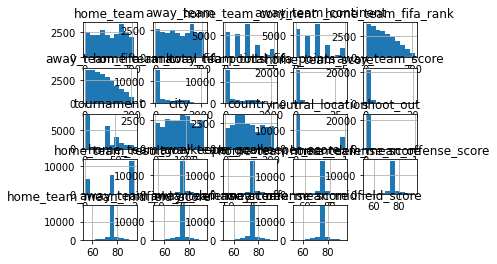

In [21]:
#histogram 
df.hist()
plt.show()

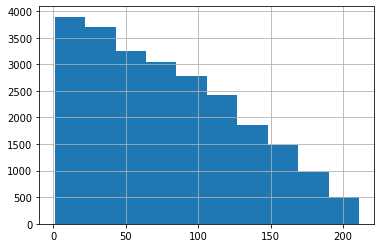

In [22]:
df['home_team_fifa_rank'].hist()

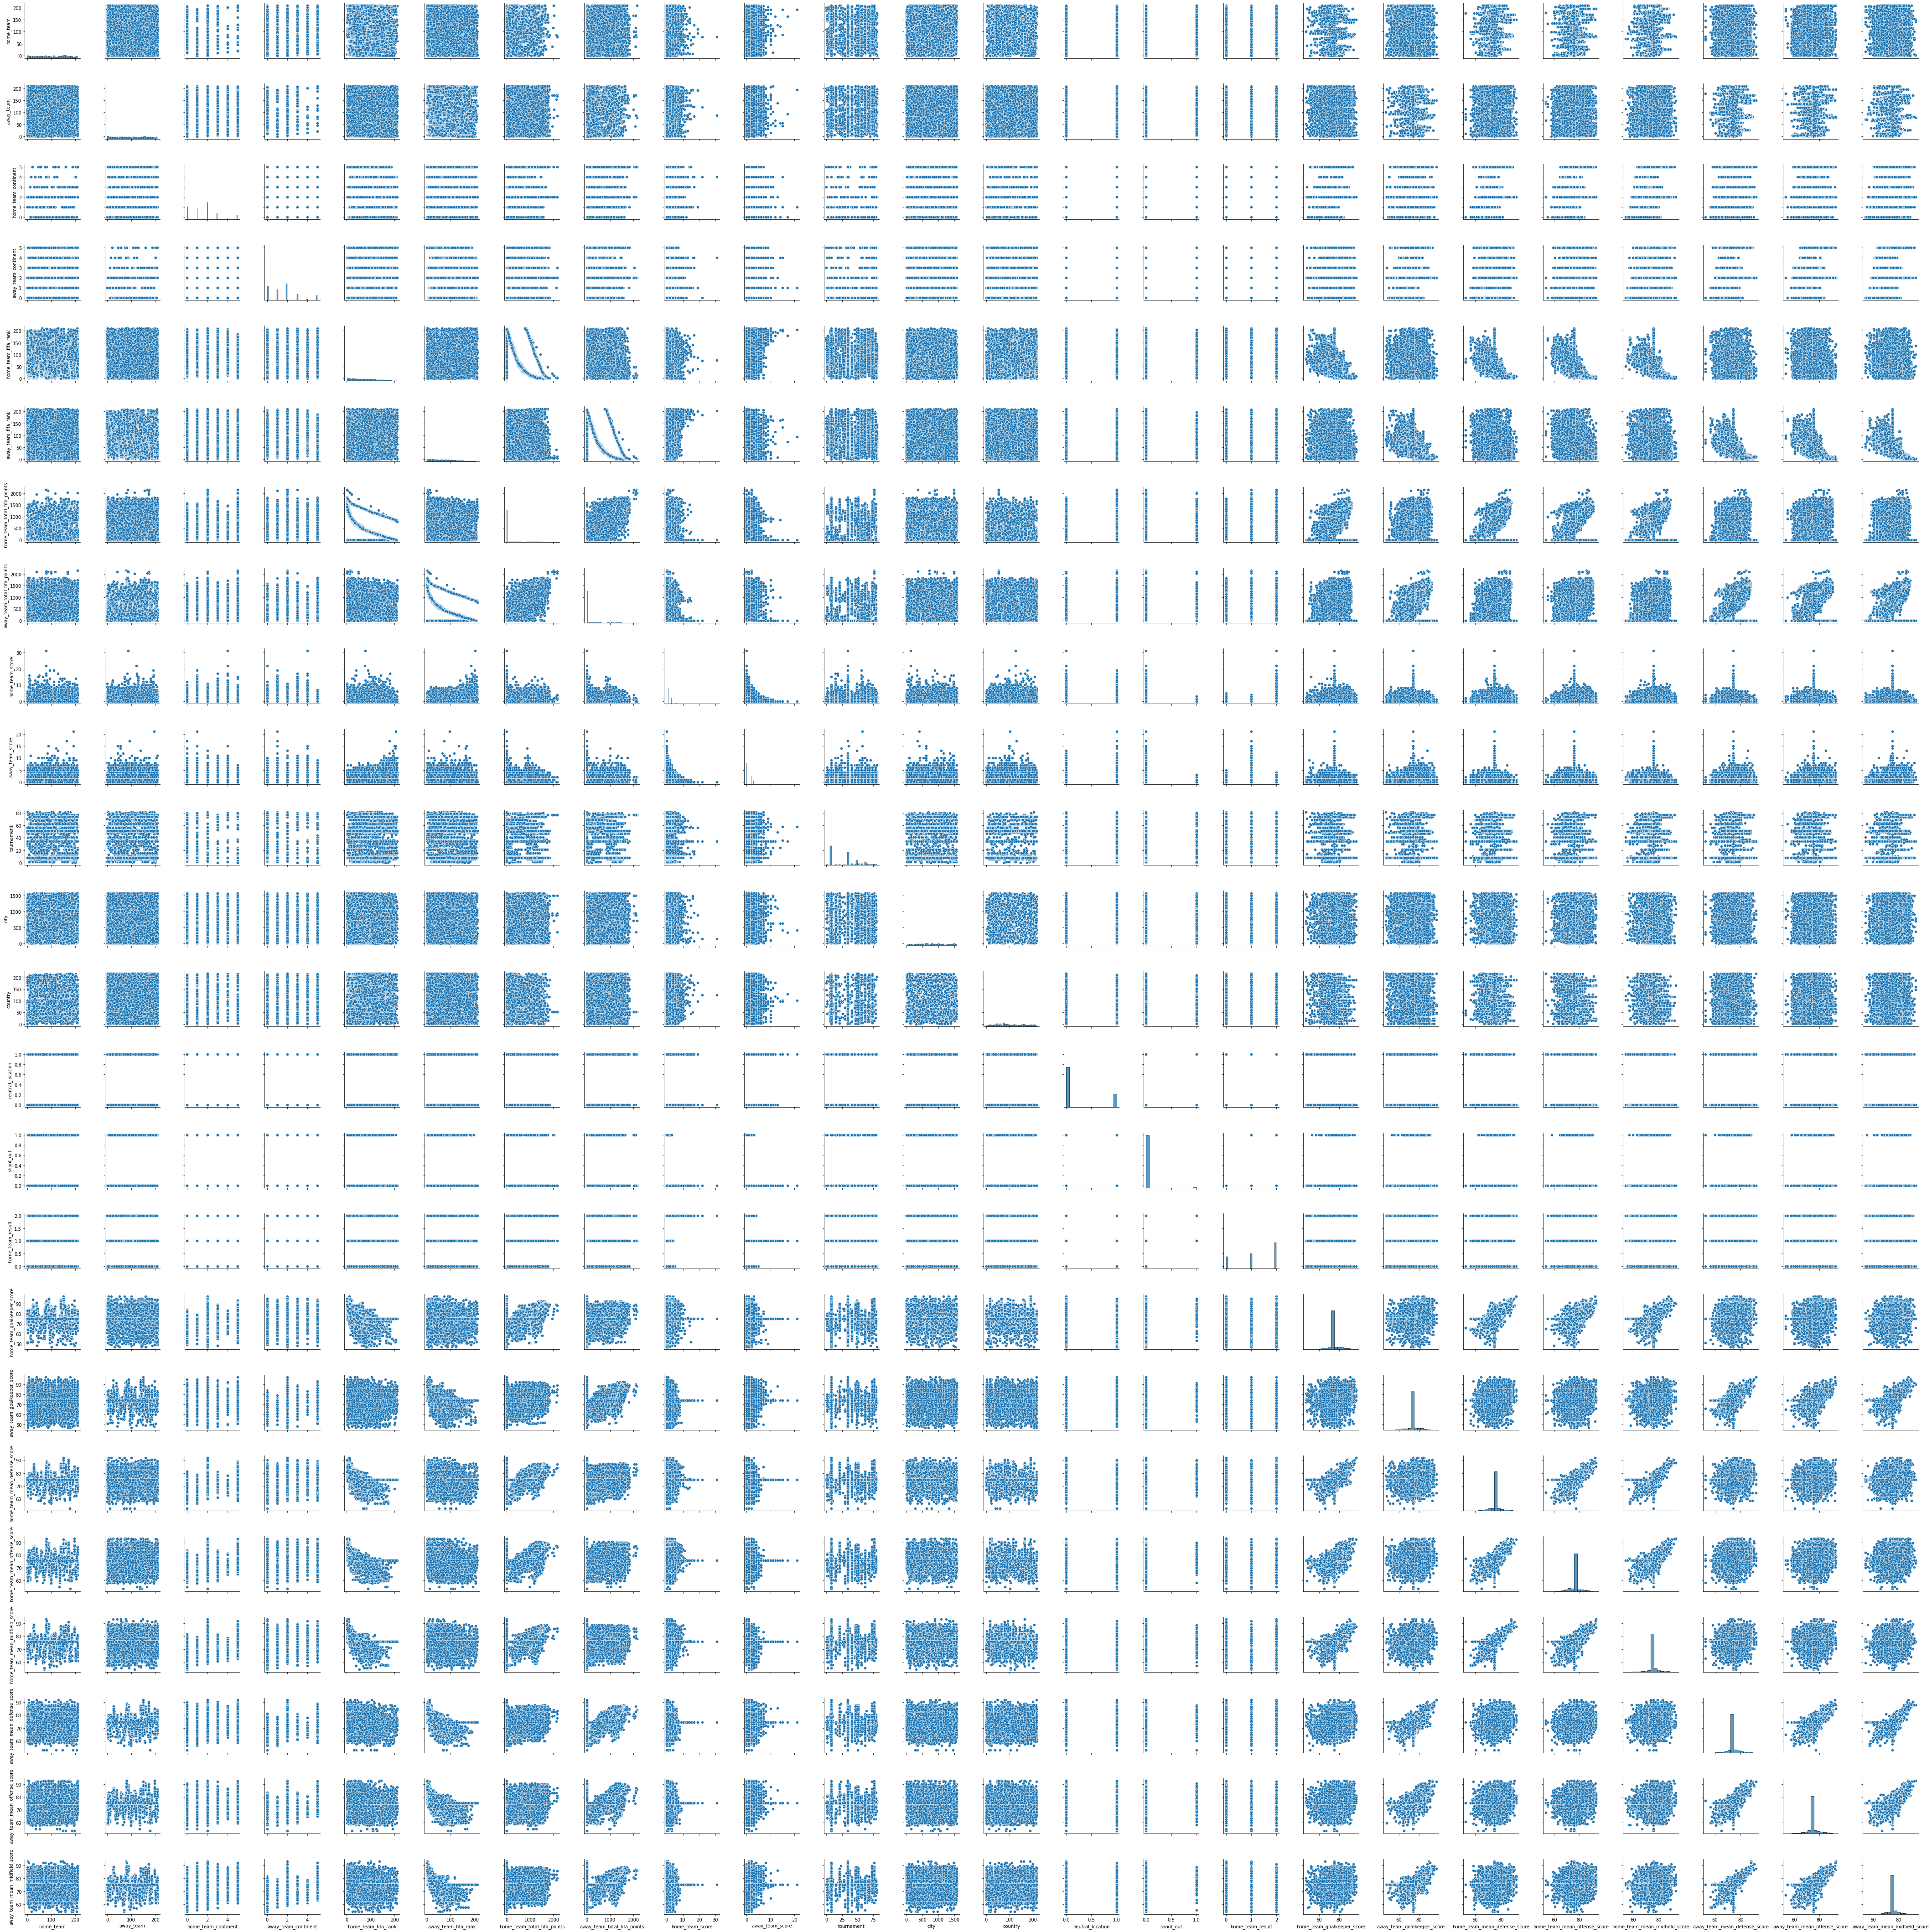

In [24]:
#multivariate plot
sns.pairplot(df)

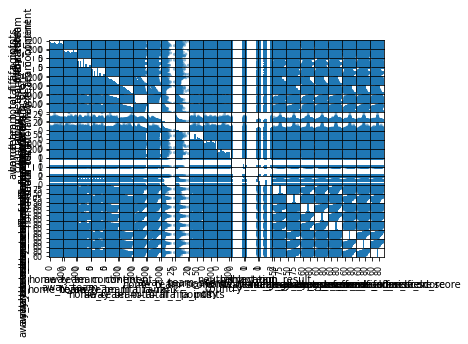

In [25]:
#scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


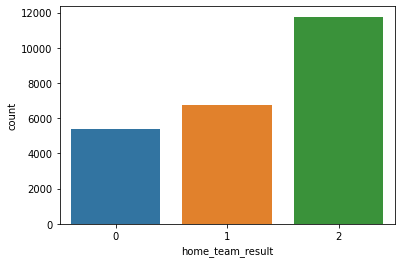

In [26]:
sns.countplot(df['home_team_result'])

In [27]:
x = df.drop(columns=['home_team_result'])
y = df['home_team_result']
x

home_team  away_team  home_team_continent  away_team_continent  \
0             74        210                    5                    5   
1             81        174                    5                    3   
2            129         56                    5                    5   
3             14         34                    0                    0   
4             20        160                    5                    5   
...          ...        ...                  ...                  ...   
23916        179        107                    2                    2   
23917         13        196                    2                    2   
23918        109        141                    5                    0   
23919        155        146                    1                    0   
23920          7        131                    1                    0   

       home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                       59                   22                            0   
1                        8                   14                            0   
2                       35                   94                            0   
3                       65                   86                            0   
4                       67                    5                            0   
...                    ...                  ...                          ...   
23916                  180                  153                          932   
23917                  192                  135                          895   
23918                   28                   60                         1526   
23919                   23                   35                         1553   
23920                   29                   32                         1519   

       away_team_total_fifa_points  home_team_score  away_team_score  ...  \
0                                0                3                1  ...   
1                                0                1                1  ...   
2                                0                5                0  ...   
3                                0                1                0  ...   
4                                0                1                3  ...   
...                            ...              ...              ...  ...   
23916                         1040                2                1  ...   
23917                         1105                0                2  ...   
23918                         1387                0                0  ...   
23919                         1499                0                3  ...   
23920                         1500                4                1  ...   

       neutral_location  shoot_out  home_team_goalkeeper_score  \
0                     0          0                   74.963838   
1                     0          0                   74.963838   
2                     0          0                   74.963838   
3                     0          0                   74.963838   
4                     0          0                   74.963838   
...                 ...        ...                         ...   
23916                 0          0                   65.000000   
23917                 0          0                   74.963838   
23918                 1          1                   79.000000   
23919                 0          0                   73.000000   
23920                 0          0                   75.000000   

       away_team_goalkeeper_score  home_team_mean_defense_score  \
0                       74.212477                     74.903249   
1                       74.212477                     74.903249   
2                       74.212477                     74.903249   
3                       74.212477                     74.903249   
4                       74.212477                     74.903249   
...                           ...                

In [29]:
y

0        2
1        0
2        2
3        2
4        1
        ..
23916    2
23917    1
23918    1
23919    1
23920    2
Name: home_team_result, Length: 23921, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [31]:
#import Scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
x_train

array([[0.78571429, 0.06190476, 0.4       , ..., 0.55447125, 0.55717933,
        0.53997802],
       [0.47142857, 0.23333333, 0.2       , ..., 0.55447125, 0.55717933,
        0.53997802],
       [0.47619048, 0.7952381 , 0.4       , ..., 0.64102564, 0.58942065,
        0.76923077],
       ...,
       [0.25714286, 0.73809524, 0.2       , ..., 0.55447125, 0.46347607,
        0.5974359 ],
       [0.72857143, 0.9       , 0.6       , ..., 0.55447125, 0.55717933,
        0.53997802],
       [0.21904762, 0.88571429, 1.        , ..., 0.55447125, 0.55717933,
        0.53997802]])

In [33]:
y_train

822      2
11630    0
22849    0
13575    0
3212     2
        ..
6400     1
15288    1
11513    1
1688     0
5994     0
Name: home_team_result, Length: 19136, dtype: int64

In [34]:
x_test

array([[0.8047619 , 0.32380952, 0.2       , ..., 0.55447125, 0.55717933,
        0.53997802],
       [0.98571429, 0.7       , 0.6       , ..., 0.55447125, 0.55717933,
        0.53997802],
       [0.31428571, 0.63333333, 0.        , ..., 0.55447125, 0.55717933,
        0.53997802],
       ...,
       [0.24761905, 0.89047619, 0.4       , ..., 0.55447125, 0.55717933,
        0.17948718],
       [0.30952381, 0.07619048, 0.        , ..., 0.55447125, 0.55717933,
        0.53997802],
       [0.84285714, 0.54285714, 0.        , ..., 0.55447125, 0.55717933,
        0.53997802]])

In [35]:
y_test

5528     2
14568    2
2004     0
17836    0
17062    2
        ..
11269    2
2267     1
22493    1
4758     2
5087     1
Name: home_team_result, Length: 4785, dtype: int64

In [36]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [37]:
y_predict = logistic_model.predict(x_test)
y_predict

array([2, 2, 1, ..., 1, 2, 1])

In [38]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 892,  120,   65],
       [  80, 1254,   14],
       [   1,   23, 2336]])

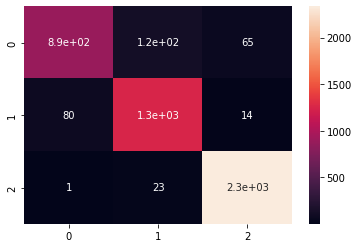

In [39]:
sns.heatmap(cm, annot=True)


In [40]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1077
           1       0.90      0.93      0.91      1348
           2       0.97      0.99      0.98      2360

    accuracy                           0.94      4785
   macro avg       0.93      0.92      0.92      4785
weighted avg       0.94      0.94      0.94      4785



In [41]:
print("accuracy : ", logistic_model.score(x_test,y_test))

accuracy :  0.9366771159874608


In [42]:
import pickle
Pkl_Filename = "logistic_model.sav"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logistic_model, file)


In [43]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

LogisticRegression(random_state=0)